# ML model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#### Data import

In [2]:
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


#### Data analysis

In [3]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [4]:
data.info()
data.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


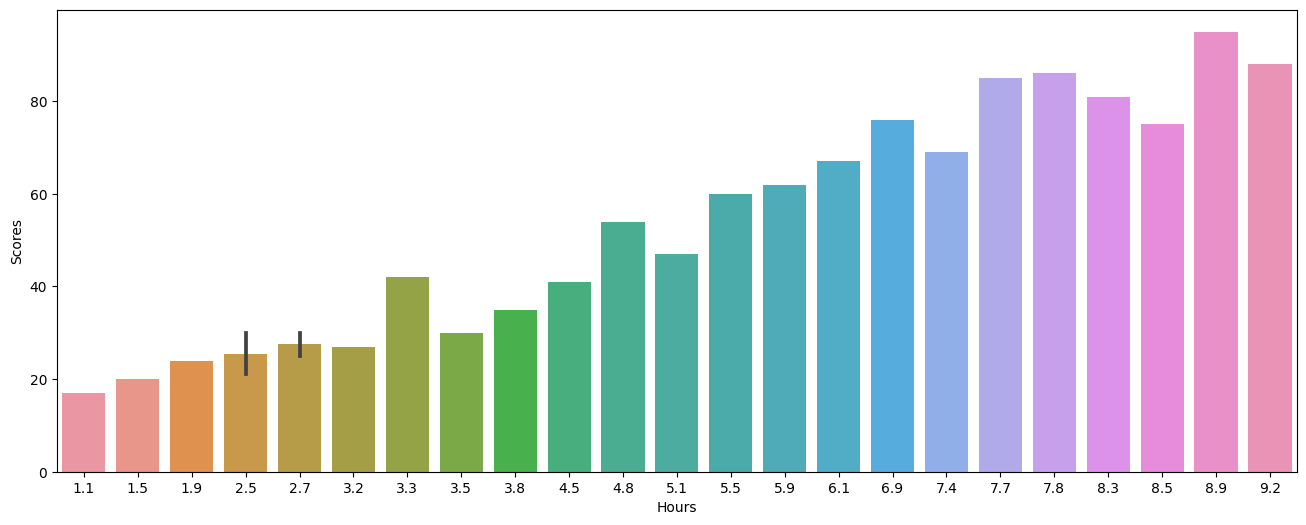

In [5]:
plt.figure(figsize=(16, 6))
sns.barplot(data=data, x='Hours', y='Scores')
plt.show()

## Model

In [6]:
# Separate the dataset
array = data.values
X = array[:, 0]
Y = array[:, 1]
X = X.reshape(-1, 1)

In [7]:
# Split the dataset
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size=0.33, random_state=31)

#### Model training

In [8]:
# train the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

#### Model evaluation

In [9]:
predictions = model.predict(x_valid)

error = mean_absolute_error(y_valid, predictions)
print('MAE',round(error,3))

MAE 5.004


In [10]:
#saving the model
pickle.dump(model, open('model.pkl', 'wb'))

## Production Code

In [11]:
model = pickle.load(open('model.pkl','rb'))

In [12]:
Hours = 4.5
example_data = [Hours]

In [13]:
model.predict([example_data])

array([47.13514651])

In [14]:
result = model.predict([example_data])[0]
round(result,2)

47.14